<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

![](images/section_I/header.png)

<ul class="pager">
  <li class="previous"><a href="0.0_overview.ipynb">Previous</a></li>
  <li class="next"><a href="0.1_calc_Intro_to_Infinite.ipynb">Next</a></li>
</ul>

# Introduction to Infinite Processes

This notebook introduces two of the earliest known examples of mathematics motivated by the difficulty of representation.  Both $\sqrt{2}$ and $\pi$ are problematic numbers.  We can easily describe them geometrically, but when it comes to actually representing them, the best we can do is approximate them.  


**GOALS**: 

- Use Babylonian Square Root Algorithm to approximate irrational numbers by hand.

- Use the Method of Exhaustion to approximate Pi

- Represent Zeno's Paradox of the Tortoise and Achilles.



### Computing Square Roots



Suppose we have a guess that we think is close to $\sqrt{2}$

$$x_1 \approx \sqrt{2} \quad \rightarrow \quad x_1 \times x_1 \approx 2 \quad \rightarrow \quad x_1 \approx \frac{2}{x_1}$$

Either $x_1$ is a better guess or $\frac{2}{x}$, but even better still would be the average of the two:

$$x_2 = \frac{1}{2} \big(x_1 + \frac{2}{x_1}\big)$$

If we continue in this manner we will get better and better approximations:

$$x_3 = \frac{1}{2} \big(x_2 + \frac{2}{x_2}\big)$$

$$x_4 = \frac{1}{2} \big(x_3 + \frac{2}{x_3}\big)$$

$$x_5 = \frac{1}{2} \big(x_4 + \frac{2}{x_4}\big)$$

$$\vdots$$

$$x_{n+1} = \frac{1}{2} \big(x_n + \frac{2}{x_n}\big)$$


We can use our familiar for loop structure to generate successive approximations for $\sqrt{2}$ based on this formulation.

In [1]:
sqrt = [2]
for i in range(10):
    next = 0.5*(sqrt[i] + 2/(sqrt[i]))
    sqrt.append(next)
    
sqrt

[2,
 1.5,
 1.4166666666666665,
 1.4142156862745097,
 1.4142135623746899,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095]

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

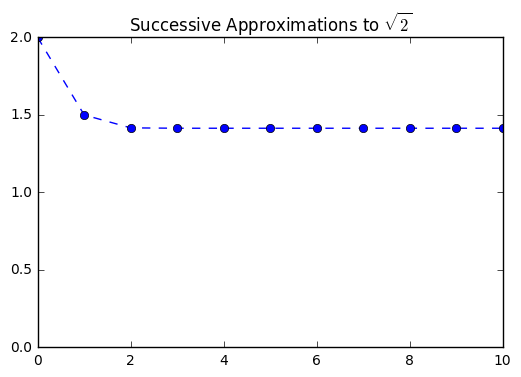

In [3]:
plt.plot(sqrt, '--o')
plt.ylim(0,2)
plt.title("Successive Approximations to $\sqrt{2}$")

### Pi and Trigonometry

Recall that we can understand $\pi$ as the ratio between the diameter and circumference of a circle.  Thus, if we have a circle with diameter 1, the circumference would be $\pi$.  We use this to approximate the value of $\pi$.

In a similar manner we can approximate the value of $\pi$.  Following Aristarchus, we can consider a sqaure mounted inside a circle of radius 1, with its vertices located at $(1, 0), (0, 1), (-1, 0),$ and $(0, -1)$.  We can use the perimeter of the square as an approximation for the circumference of the circle.

![](images/squrecirc.png)

A better approximation would be if we used a regular polygon with twice as many sides.  We can understand this as placing points at the halfway between each existing vertex.  To mathematize this, let's refresh our memory of the unit circle.

#### Unit Circle

The unit circle describes the location of points around a circle of radius 1.  For us, we care about the use of $\cos$ and $\sin$ to place coordinates on the circle.  If we cut our square in half, we would have points every $45^o$ or $\frac{\pi}{2}$, and can use the trigonometric measures of these angles as ways to find the coordinates.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Unit_circle.svg/372px-Unit_circle.svg.png)

We demonstrate the first two iterations of this below using `matplotlib.patches` Circle and RegularPolygon Functions.  

(-1, 1)

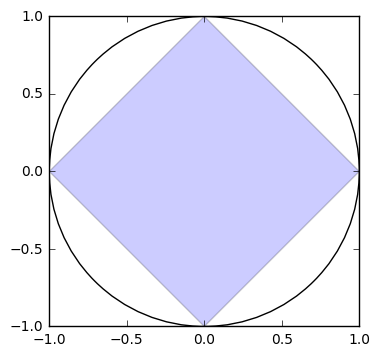

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(patches.RegularPolygon((0,0), 4,1, alpha = .2))
ax1.add_patch(patches.Circle((0,0), 1, fill = False))
plt.xlim(-1,1)
plt.ylim(-1,1)

(-1, 1)

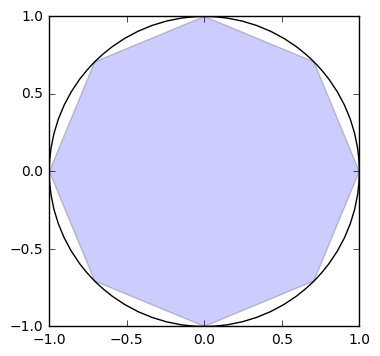

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(patches.RegularPolygon((0,0),8,1, alpha = 0.2)) #center with 8 sides, radius 1
ax1.add_patch(patches.Circle((0, 0), 1, fill = False))
plt.xlim(-1,1)
plt.ylim(-1,1)

The coordinate values of the points can be found with some creative use of a list comprehension and our knowledge of the angles.

In [6]:
square_approx = [[np.cos(i*np.pi/2), np.sin(i*np.pi/2)] for i in range(4)]

In [7]:
square_approx

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0]]

#### Extending the Approximation

The work above is a strict under approximation for $\pi$.  We will always get a value less than it, as we will never completely fill the circle.  

We could arrive at an upper bound for $\pi$ by constructing a square outside of the circle and continually bisecting the sides to limit an upper boundary for out guess.  Archimedes performed this in writing in the second century BC.  

### Zeno's Paradox

The philosopher Zeno of Elea is said to be the product of a series of paradoxical questions, one of which dealt with the difficulty in quantifying the continuum.  Here, the problem involved a race between a tortise and Achilles (a man).  The tortise got a head start.  Aristotle describes the problem in his Physics as follows:

>*"This claims that the slowest funner will never be caught by the fastest runner, because the one behind has first to reach the point from which the one in front started, and so the slower one is obound always to be in front" Aristotle"*, Physics 239b14 - 18

The problem, according to Zeno, has been interpreted to mean that it is impossible to cross any unit distance before crossing half of it.  It is impossible to cross this half without having crossed half of the half.  Continue the argument to infinity and how can we ever move?!  The image below offers a visualization of the problem.

![](images/zeno.png)








#### Zeno and Sums

If we examine the image above, it should make sense to us that the sum of the terms of Zeno's sequence add to one.  It may be counter intuitive to think that an infinite number of terms add to a finite number, however this is one of the fundamental problems for us.  What happens in the realm of the infinitely small?  

We can use our tools to investigate this.  First, let us create a sequence of Zeno's terms as follows.

$$\displaystyle \text{Zeno =} \quad [~ \frac{1}{2}, ~ \frac{1}{2^2}, ~ \frac{1}{2^3}, ...]$$


Now, we will create a sequence that provides the **partial sums** of the terms of Zeno as:

$$\displaystyle \text{Partial Sums = } ~ [\frac{1}{2}, ~ \frac{1}{2} + ~ \frac{1}{4}, ~ \frac{1}{2} + \frac{1}{4} + \frac{1}{16}, ...]$$


We will also plot these side by side to compare. 

$~$

<div class="alert alert-info">
  <strong>Sum Function!</strong> Note the use of the function `sum` in the construction of the partial sums.
</div>

In [8]:
zeno = [1/2**(i+1) for i in range(10)]
zeno

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625]

In [9]:
zeno_sums = [sum(zeno[:i]) for i in range(10)]

In [10]:
zeno_sums

[0,
 0.5,
 0.75,
 0.875,
 0.9375,
 0.96875,
 0.984375,
 0.9921875,
 0.99609375,
 0.998046875]

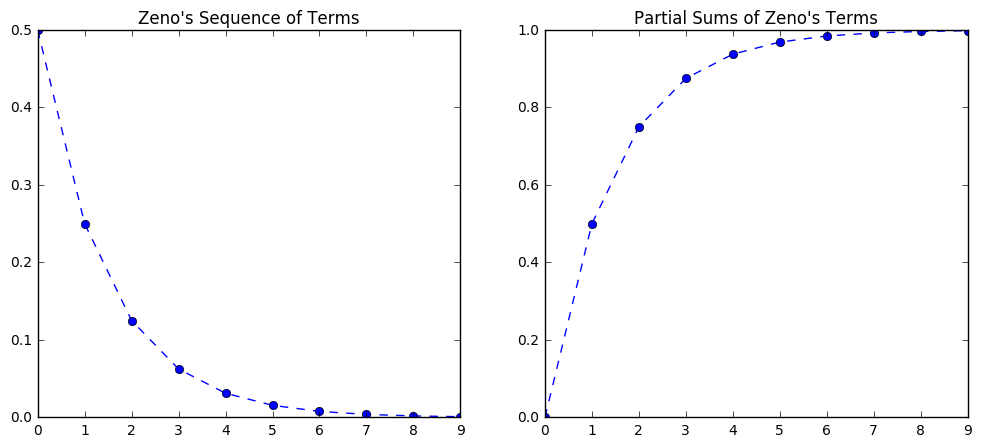

In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(zeno, '--o')
plt.title("Zeno's Sequence of Terms")

plt.subplot(1, 2, 2)
plt.plot(zeno_sums, '--o')
plt.title("Partial Sums of Zeno's Terms")